In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
class Bandit:
    def __init__ (self, delta, mean1 ):
        self.gap = delta
        self.sigma = 1 # for our entire course, we are assuming sigma = 1
        self.a = mean1
        self.b = self.a - self.gap

    def play_arm(self, arm):
        if arm == 1:
            return np.random.normal(self.a, self.sigma)
        elif arm == 2:
            return np.random.normal(self.b, self.sigma)

    def regret(self, arm):
        if arm == 1:
            return 0
        if arm == 2:
            return (self.a - self.b)

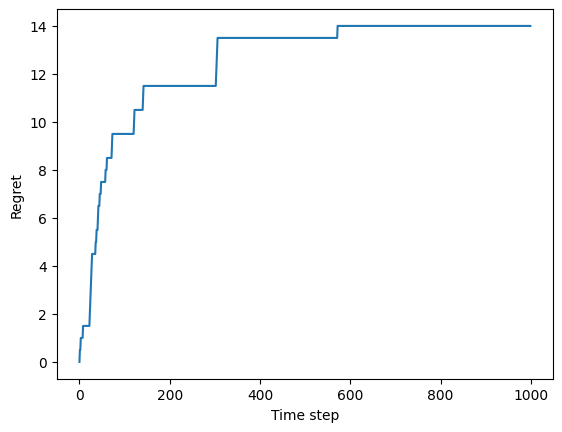

In [ ]:
# total number of rounds
t = 1000
gap = 0.5

env = Bandit(gap)

reward1 = []
reward2 = []
cumulative_regret = []
total_regret = 0

counts = [0,0]
rewards = [0,0]

estimated_mean = [np.inf, np.inf]
ucb_values = [np.inf, np.inf]

for i in range(1000):

    #choosing the arm with the highest ucb value

    current_arm = np.argmax(ucb_values)

    reward = env.play_arm(current_arm + 1)
    counts[current_arm] += 1
    rewards[current_arm] += reward

    estimated_mean[current_arm] = rewards[current_arm] / counts[current_arm]

    # updating the UCB values
    temp = ((2*np.log(1/0.01)/counts[current_arm]))**(1/2)

    ucb_values[current_arm] = estimated_mean[current_arm] + temp

    # updating regret
    temp = env.regret(current_arm+1)
    total_regret += temp
    cumulative_regret.append(total_regret)


plt.plot(cumulative_regret)
plt.xlabel('Time step')
plt.ylabel('Regret')
plt.show()



In [ ]:
def thompson_sampling(mu1, mu2, T):
  #Initializing number of times each arm is played
  n1 = 0
  n2 = 0

  #Initializing sum of rewards obtained from each arm
  #Prior Dist N(0,1)
  reward_sum1 = 0
  reward_sum2 = 0
  post_mean1 = 0
  post_mean2 = 0
  post_sigma1 = 1
  post_sigma2 = 1
  theta1, theta2 = 0, 0

  #Initializing regrets
  regret = 0
  regrets = []

  for t in range(T):
    theta1 = np.random.normal(post_mean1, post_sigma1)
    theta2 = np.random.normal(post_mean2, post_sigma2)
    if theta1 > theta2:
      arm = 1
    else:
      arm = 2

    if arm == 1:
      reward = np.random.normal(mu1, 1)
      reward_sum1 += reward
      n1 += 1
      post_mean1 = (post_sigma1*2 * reward + 1 * post_mean1) / (post_sigma1*2 + 1)
      post_sigma1 =  np.sqrt((post_sigma1*2 * 1) / (post_sigma1*2 + 1))
      mu = mu1
    else:
      reward = np.random.normal(mu2, 1)
      reward_sum2 += reward
      n2 +=1
      post_mean2 = (post_sigma2*2 * reward + 1 * post_mean2) / (post_sigma2*2 + 1)
      post_sigma2 = np.sqrt((post_sigma2*2 * 1) / (post_sigma2*2 + 1))
      mu = mu2

    regret += max(mu1, mu2) - mu
    regrets.append(regret)
  return(regrets)



# Thompson Sampling


In [ ]:
def thompson(gap, mu1):
    # number of rounds
    t = 1000

    # initialising the number of times each arm has been played
    counts = [0,0]

    # for the purpose of this I will be picking the mean 1 ie. best arm to be 5

    env = Bandit(gap, mu1)

    # this if for our distribusion
    sigma = [1,1]

    # playing both the arms once, and taking their avergae as the starting posterior

    avg = (env.play_arm(1) + env.play_arm(2))/2
    posterior = [avg, avg]

    theta = [0,0]

    total_regret = 0
    cumulative_regret = []

    for i in range(t):
        theta[0] = np.random.normal(posterior[0], sigma[0])
        theta[1] = np.random.normal(posterior[1], sigma[1])

        if theta[0] > theta[1]:
            current_arm = 0
        else:
            current_arm = 1

        if current_arm == 0:
            counts[0] += 1
            reward = env.play_arm(1)

            posterior[0] = (posterior[0] + reward*(sigma[0]**2))/(1 + sigma[0]**2)
            sigma[0] = np.sqrt((sigma[0]**2) / (1 + sigma[0]**2 ))

            regret = env.regret(1)
            total_regret += regret
            cumulative_regret.append(total_regret)
        else:
            counts[1] += 1
            reward = env.play_arm(2)

            posterior[1] = (posterior[1] + reward*(sigma[1]**2))/(1 + sigma[1]**2)
            sigma[1] = np.sqrt((sigma[1]**2) / (1 + sigma[1]**2 ))

            regret = env.regret(2)
            total_regret += regret
            cumulative_regret.append(total_regret)




    return cumulative_regret



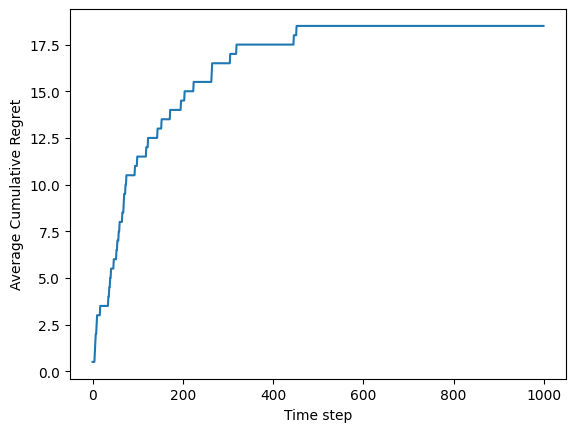

In [ ]:
gap = 0.5
mu1 = 3

a = thompson(gap, mu1)

plt.plot(a)
plt.xlabel('Time step')
plt.ylabel('Average Cumulative Regret')
plt.show()

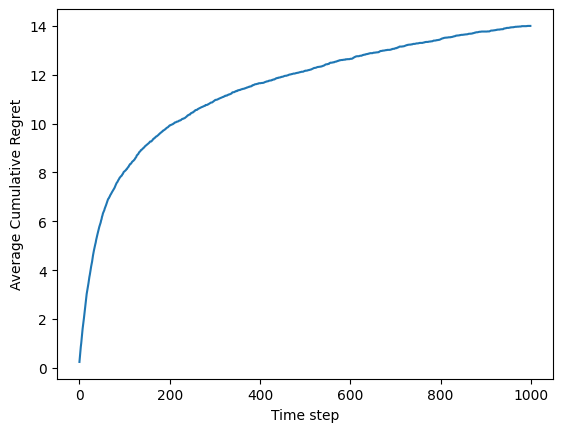

In [ ]:
num_runs = 100
t = 1000
gap = 0.5
mu1 = 3

# Create an array to store the cumulative regret of each run
cumulative_regret_array = np.zeros((num_runs, t))

# Run the thompson function num_runs times and store the cumulative regret in the array
for i in range(num_runs):
    cumulative_regret_array[i] = thompson(gap, mu1)

# Calculate the average cumulative regret over the num_runs runs
average_cumulative_regret = np.mean(cumulative_regret_array, axis=0)

# Plot the average cumulative regret
plt.plot(average_cumulative_regret)
plt.xlabel('Time step')
plt.ylabel('Average Cumulative Regret')
plt.show()

# Linear Bandits


In [ ]:
# defining the environment

class LinearBandit:
    def __init__(self, arms, features):
        self.num_arms = arms
        self.num_features = features

        #initialising the theta
        self.theta = np.random.randn(self.num_features)

        # create the X or the feature vectors for all the arms

        self.arms = np.random.randn(self.num_arms, self.num_features)

        expected_rewards = np.dot(self.arms, self.theta)

        self.best_arm = np.argmax(expected_rewards)

        self.best_reward = expected_rewards[self.best_arm]


    def play_arm(self, arm):

        actual_reward = self.theta @ self.arms[arm]

        # adding noise to the actual reward

        reward = np.random.normal(actual_reward, 1)

        return reward


    def regret(arm):
        reward = np.dot(arm, self.theta)
        return self.best_reward - reward



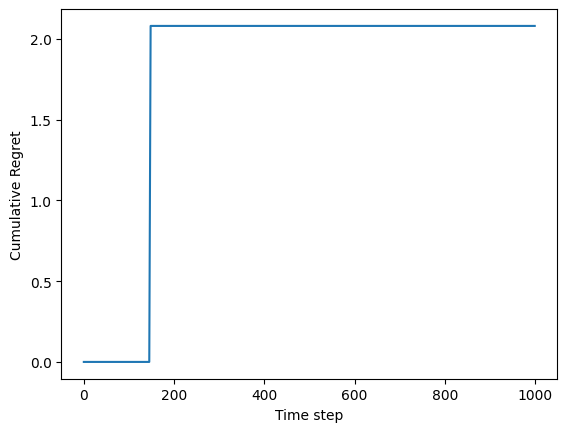

In [ ]:
# defining the basics
t = 1000
num_arms = 2 # ARM COUNT IS FIXED, DO NOT CHNAGE
num_features = 3

# initialising
env = LinearBandit(num_arms, num_features)

# initialising the covariance matrix for both arms
A0 = np.eye(num_features)
# A1 = np.eye(num_features)

b0 = np.zeros(num_features)
# b1 = np.zeros(num_features)

# exploration exploitation tradeoff parameter
aplha = 1

# other variable
total_regret = 0
cumulative_regret = []


for i in range(t):

    theta_hat = np.linalg.solve(A0, b0)
    p = [0,0]

    # look at both arms



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
def linucb():
    num_arms = 2
    num_features = 5
    num_rounds = 1000

    # Initialize the environment
    env = LinearBandit(num_arms, num_features)

    # Initialize data structures
    A = np.eye(num_features)  # covariance matrix
    b = np.zeros(num_features)  # response vector

    # Confidence bound parameter
    alpha = 1

    # Store cumulative regret
    cumulative_regret = []
    total_regret = 0

    # UCB algorithm
    for t in range(num_rounds):
        # Compute the upper confidence bounds for each arm
        theta_hat = np.linalg.solve(A, b)
        p = np.zeros(num_arms)
        for a in range(num_arms):
            arm_features = env.arms[a]
            p[a] = arm_features @ theta_hat + alpha * np.sqrt(arm_features @ np.linalg.inv(A) @ arm_features.T)

        # Choose the arm with the highest upper confidence bound
        chosen_arm = np.argmax(p)

        # Play the chosen arm and observe the reward
        reward = env.play_arm(chosen_arm)

        # Update the estimates and confidence bounds
        A += np.outer(env.arms[chosen_arm], env.arms[chosen_arm])
        b += reward * env.arms[chosen_arm]

        # Calculate the regret
        regret = env.best_reward - env.theta @ env.arms[chosen_arm]
        total_regret += regret
        cumulative_regret.append(total_regret)

    return cumulative_regret


# Plot the cumulative regret
# plt.plot(cumulative_regret)
# plt.xlabel('Time step')
# plt.ylabel('Cumulative Regret')
# plt.show()


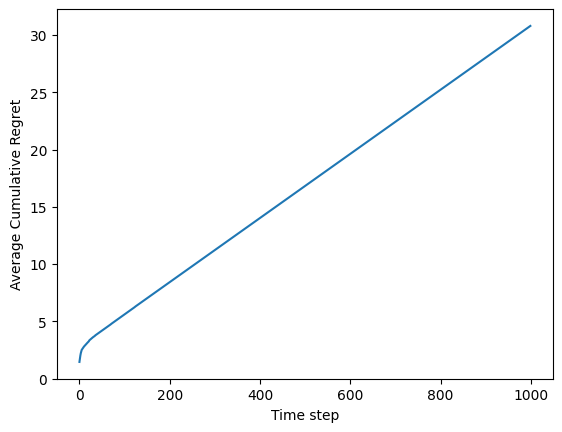

In [ ]:
num_arms = 100

for i in range(num_runs):
    cumulative_regret_array[i] = linucb()

# Calculate the average cumulative regret over the num_runs runs
average_cumulative_regret = np.mean(cumulative_regret_array, axis=0)

# Plot the average cumulative regret
plt.plot(average_cumulative_regret)
plt.xlabel('Time step')
plt.ylabel('Average Cumulative Regret')
plt.show()

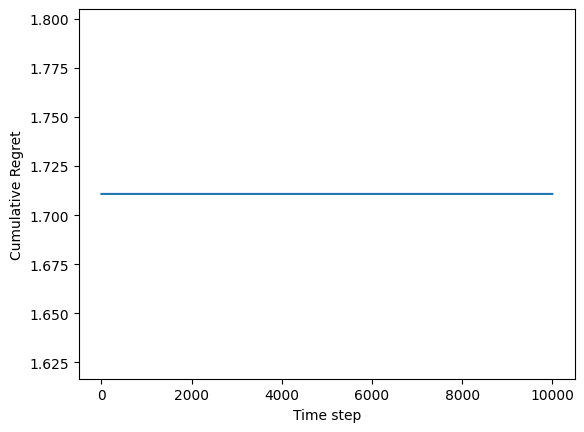

In [ ]:
num_arms = 2
num_features = 5
num_rounds = 10000

# Initialize the environment
env = LinearBandit(num_arms, num_features)

# Initialize data structures
A = np.eye(num_features)  # covariance matrix
b = np.zeros(num_features)  # response vector

# Confidence bound parameter
alpha = 1

# Store cumulative regret
cumulative_regret = []
total_regret = 0

# UCB algorithm
for t in range(num_rounds):
    # Compute the upper confidence bounds for each arm
    theta_hat = np.linalg.solve(A, b)
    p = np.zeros(num_arms)
    for a in range(num_arms):
        arm_features = env.arms[a]
        p[a] = arm_features @ theta_hat + alpha * np.sqrt(arm_features @ np.linalg.inv(A) @ arm_features.T)

    # Choose the arm with the highest upper confidence bound
    chosen_arm = np.argmax(p)

    # Play the chosen arm and observe the reward
    reward = env.play_arm(chosen_arm)

    # Update the estimates and confidence bounds
    A += np.outer(env.arms[chosen_arm], env.arms[chosen_arm])
    b += reward * env.arms[chosen_arm]

    # Calculate the regret
    regret = env.best_reward - env.theta @ env.arms[chosen_arm]
    total_regret += regret
    cumulative_regret.append(total_regret)

len(cumulative_regret)


plt.plot(cumulative_regret)
plt.xlabel('Time step')
plt.ylabel('Cumulative Regret')
plt.show()